In [691]:
#Identify the proper index that fits this solution

In [692]:
%matplotlib inline
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [693]:
dss = pd.read_csv('DepartmentStoreSales.csv')

In [694]:
dss.head()

,Quarter,Sales
0,1,50147
1,2,49325
2,3,57048
3,4,76781
4,5,48617


In [695]:
len(dss)

24

In [696]:
dss

,Quarter,Sales
0,1,50147
1,2,49325
2,3,57048
3,4,76781
4,5,48617
5,6,50898
6,7,58517
7,8,77691
8,9,50862
9,10,53028


In [697]:
sales_ts = pd.Series(dss.Sales.values, index=dss.Quarter, name='Sales')

In [698]:
sales_ts

Quarter
1      50147
2      49325
3      57048
4      76781
5      48617
6      50898
7      58517
8      77691
9      50862
10     53028
11     58849
12     79660
13     51640
14     54119
15     65681
16     85175
17     56405
18     60031
19     71486
20     92183
21     60800
22     64900
23     76997
24    103337
Name: Sales, dtype: int64

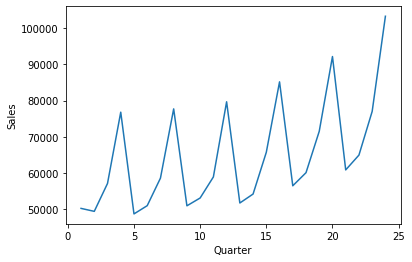

In [699]:
ax = sales_ts.plot()
ax.set_xlabel('Quarter')
ax.set_ylabel('Sales')
plt.show()

The following methods would not be suitable for forecasting this series: 1) Moving average of raw series, 2) Simple exponential smoothing of the raw series and 3) Double exponential smoothing of the raw series.

In [700]:
#partition the data
train_ts = sales_ts[0:20]
valid_ts = sales_ts[20:25]

In [701]:
len(valid_ts)

4

C:\Users\GETHSEMAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\GETHSEMAN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\GETHSEMAN\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


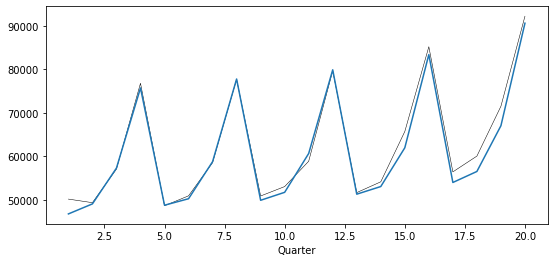

In [702]:
# run exponential smoothing with multiplicative trend and multiplicative seasonality
expSmooth = ExponentialSmoothing(train_ts, trend='additive', seasonal='multiplicative', seasonal_periods=4, freq=None)
expSmoothFit = expSmooth.fit(smoothing_level = 0.2, smoothing_slope=0.15, smoothing_seasonal = 0.05)

fig, ax = plt.subplots(figsize=(9,4))
train_ts.plot(ax=ax, color='black', linewidth=0.5)
#valid_ts.plot(ax=ax, color='black', linewidth=0.25)

expSmoothFit.fittedvalues.plot(ax=ax)
#expSmoothFit.forecast(len(valid_ts)).plot(ax=ax, style='--', linewidth=2, color='C0')


plt.show()

In [703]:
print(expSmoothFit.forecast(len(valid_ts)))

20    58940.902641
21    61416.610864
22    72077.383049
23    95804.447211
dtype: float64


C:\Users\GETHSEMAN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [706]:
#Calcuate MAPE
y_true = [60,800, 64,900, 76,997, 103,337]
y_pred = [58940.902641, 61416.610864, 72077.383049, 95804.447211]


Yes,the model is suitable for forecasting Q21 and Q22. Note Q21 is  58940.902641 and Q22 is 61416.610864 in this case